# 2022-08-12 

In [2]:
%matplotlib inline 

In [153]:
# 로지스틱 회귀모형 이용한 이진분류 
from sklearn.datasets import load_iris 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 

data = load_iris()
X = data.data 
y = data.target 

idx0 = np.where(y==0)
idx1 = np.where(y==1)
idx = np.concatenate([idx0, idx1], axis=1)
X = X[idx, :]
y = y[idx]

x_train, x_test, y_train, y_test = train_test_split(X[0], y[0], test_size=0.25) 

In [147]:
# 로지스틱 회귀모형 
from sklearn.linear_model import LogisticRegression 
classifier = LogisticRegression(random_state=0) # random_state=0 ; 모형에 데이터 투입할 때 Shuffle 하기 위해서 지정
classifier.fit(x_train, y_train) # 학습

LogisticRegression(random_state=0)

In [158]:
y_pred = classifier.predict(x_test)
cm = confusion_matrix(y_test, y_pred) ; cm 

array([[16,  0],
       [ 0,  9]], dtype=int64)

In [159]:
accuracy_score(y_test, y_pred)

1.0

## 다른 데이터셋으로 다시 시도; 데이터 수 너무 적다. 

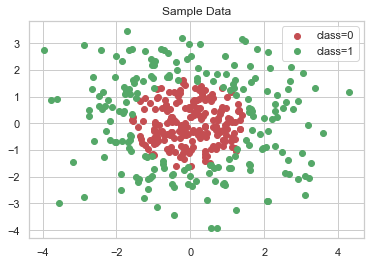

In [251]:
# 데이터셋 호출 
from sklearn.datasets import make_gaussian_quantiles

# 임의 생성 데이터셋
x1, y1 = make_gaussian_quantiles(cov=2.0, random_state=0, n_samples=200, n_features=2, n_classes=2, shuffle=True)
x2, y2 = make_gaussian_quantiles(cov=2.0, random_state=1, n_samples=200, n_features=2, n_classes=2, shuffle=True)

X = np.concatenate([x1, x2], axis=0) ; y = np.concatenate([y1, y2], axis=0) 

idx_0 = np.where(y==0); idx_1 = np.where(y==1)

plt.scatter(X[idx_0, 0], X[idx_0,1], c='r', label='class=0')
plt.scatter(X[idx_1, 0], X[idx_1,1], c='g', label='class=1')
plt.legend()
plt.title('Sample Data')
plt.show() 

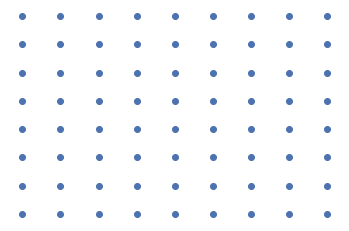

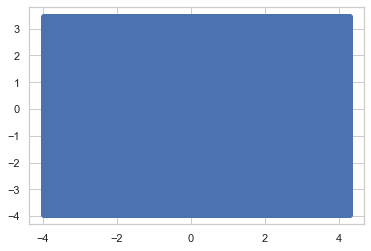

In [252]:
# 모델 성능 검증에 쓸 데이터셋 형태 둘러보기 
x1_min, x1_max = X[:,0].min(), X[:,0].max() 
x2_min, x2_max = X[:,1].min(), X[:,1].max() 

xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 1), np.arange(x2_min, x2_max, 1))
plt.scatter(xx1, xx2)
plt.axis('off')
plt.show() 

xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.02), np.arange(x2_min, x2_max, 0.02))
plt.scatter(xx1, xx2)

In [253]:
# 로지스틱 회귀 분류기 학습 
classifier.fit(X, y)

LogisticRegression(random_state=0)

In [254]:
# 로지스틱 회귀 분류기 새 데이터 예측 
xx_predict = np.c_[xx1.ravel(), xx2.ravel()]
Y = classifier.predict(xx_predict).reshape(xx1.shape)

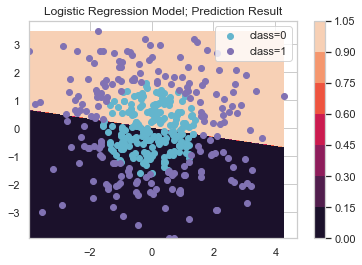

In [255]:
cs = plt.contourf(xx1, xx2, Y)
plt.colorbar(cs)

idx_0 = np.where(y==0); idx_1 = np.where(y==1)
plt.scatter(X[idx_0, 0], X[idx_0,1], c='c', label='class=0')
plt.scatter(X[idx_1, 0], X[idx_1,1], c='m', label='class=1')
plt.legend()
plt.title('Logistic Regression Model; Prediction Result')
plt.show() 

In [180]:
import xgboost

xgb_model = xgboost.XGBClassifier(n_estimators=100, max_depth=1, random_state=0)

xgb_model.fit(X, y)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=1, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

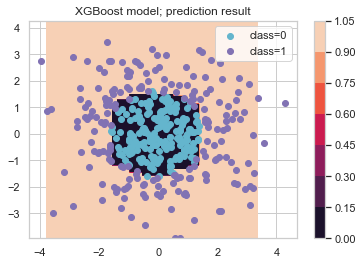

In [186]:
xgb_Y = xgb_model.predict(xx_predict).reshape(xx1.shape)

cs = plt.contourf(xx1, xx2, xgb_Y)
plt.colorbar(cs)

idx_0 = np.where(y==0); idx_1 = np.where(y==1)
plt.scatter(X[idx_0, 0], X[idx_0,1], c='c', label='class=0')
plt.scatter(X[idx_1, 0], X[idx_1,1], c='m', label='class=1')
plt.legend()
plt.title('XGBoost model; prediction result')
plt.show() 

### 새 데이터셋 넣었을 때 로지스틱 회귀모형은 xgboost 모형보다 분류 정확성이 떨어졌다. 

### 서포트벡터 머신 

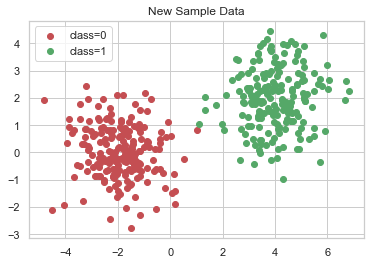

In [257]:
x1, y1 = make_gaussian_quantiles(mean=[4,2],cov=1, random_state=3, n_samples=200, n_features=2, n_classes=1, shuffle=True)
x2, y2 = make_gaussian_quantiles(mean=[-2,0],cov=1, random_state=1, n_samples=200, n_features=2, n_classes=1, shuffle=True)
y1 = [1]*len(y1)
X = np.concatenate([x1, x2], axis=0) ; y = np.concatenate([y1, y2], axis=0) 

idx_0 = np.where(y==0); idx_1 = np.where(y==1)

plt.scatter(X[idx_0, 0], X[idx_0,1], c='r', label='class=0')
plt.scatter(X[idx_1, 0], X[idx_1,1], c='g', label='class=1')
plt.legend()
plt.title('New Sample Data')
plt.show() 

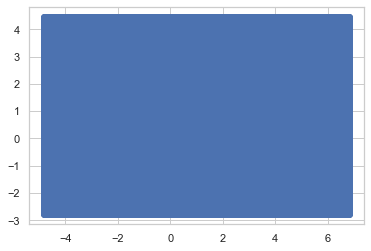

In [258]:
x1_min, x1_max = X[:,0].min(), X[:,0].max() 
x2_min, x2_max = X[:,1].min(), X[:,1].max()  

xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.02), np.arange(x2_min, x2_max, 0.02))
plt.scatter(xx1, xx2)

In [259]:
# 서포트벡터 머신 
from sklearn.svm import SVC
classifier_svm = SVC(kernel='linear', random_state=0)
# 모델 학습 
classifier_svm.fit(X, y)

SVC(kernel='linear', random_state=0)

In [260]:
xx_predict = np.c_[xx1.ravel(), xx2.ravel()]
Y = classifier_svm.predict(xx_predict).reshape(xx1.shape)

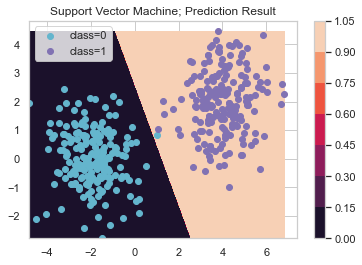

In [261]:
cs = plt.contourf(xx1, xx2, Y)
plt.colorbar(cs)

idx_0 = np.where(y==0); idx_1 = np.where(y==1)
plt.scatter(X[idx_0, 0], X[idx_0,1], c='c', label='class=0')
plt.scatter(X[idx_1, 0], X[idx_1,1], c='m', label='class=1')
plt.legend()
plt.title('Support Vector Machine; Prediction Result')
plt.show() 

## 나이브베이즈 분류모형 

In [266]:
from sklearn.naive_bayes import GaussianNB

classifier = GaussianNB() 
classifier.fit(X, y)

GaussianNB()

In [267]:
yy = classifier.predict(xx_predict).reshape(xx1.shape)

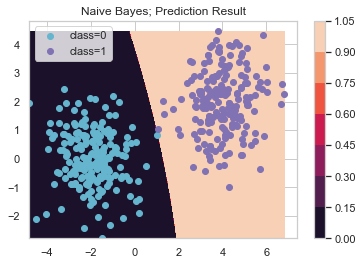

In [269]:
cs = plt.contourf(xx1, xx2, yy)
plt.colorbar(cs)

idx_0 = np.where(y==0); idx_1 = np.where(y==1)
plt.scatter(X[idx_0, 0], X[idx_0,1], c='c', label='class=0')
plt.scatter(X[idx_1, 0], X[idx_1,1], c='m', label='class=1')
plt.legend()
plt.title('Naive Bayes; Prediction Result')
plt.show() 

In [270]:
# 분류알고리즘 별 성능 비교 
from sklearn.tree import DecisionTreeClassifier
import xgboost
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [277]:
from sklearn.datasets import load_breast_cancer 

data = load_breast_cancer() 
X = data.data 
y = data.target 
feature_names = data.feature_names

df = pd.DataFrame(X, columns=feature_names)
df['y'] = y

In [285]:
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,y
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [286]:
df.shape

(569, 31)

In [287]:
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
y                          0
dtype: int64

In [290]:
from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=True)

In [292]:
print(x_train.shape) ; print(x_test.shape)

(426, 30)
(143, 30)


In [294]:
# 의사결정나무 분류모델 
decisiontree_model = DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=0).fit(x_train, y_train)

# xgboost 
xgb_model = xgboost.XGBClassifier(n_estimators=100, max_depth=1, random_state=0).fit(x_train, y_train)

# random forest 
randomforest_model = RandomForestClassifier(max_depth=1, n_estimators=100, random_state=0).fit(x_train, y_train)

# logistic regrssion
logistic_model = LogisticRegression(random_state=0).fit(x_train, y_train)

# svm 
xvm_model = SVC(kernel='linear', random_state=0).fit(x_train, y_train)

# naive bayes 
naive_model = GaussianNB().fit(x_train, y_train)

In [300]:
from sklearn.metrics import accuracy_score 
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score 

def result_presentation(model) : 
    y_pred = model.predict(x_test)
    acc_score = accuracy_score(y_test, y_pred)
    prc_score = precision_score(y_test, y_pred)
    rec_score = recall_score(y_test, y_pred)

    return acc_score, prc_score, rec_score 


In [303]:
acc_score1, prc_score1, rec_score1 = result_presentation(decisiontree_model)
acc_score2, prc_score2, rec_score2 = result_presentation(xgb_model)
acc_score3, prc_score3, rec_score3 = result_presentation(randomforest_model)
acc_score4, prc_score4, rec_score4 = result_presentation(logistic_model)
acc_score5, prc_score5, rec_score5 = result_presentation(xvm_model)
acc_score6, prc_score6, rec_score6 = result_presentation(naive_model)

In [330]:
result_df = pd.DataFrame({
    '알고리즘' : ['TR', 'XGB', 'RF', 'LR', 'SVM', 'NB'], 
    '정확도' : [acc_score1, acc_score2, acc_score3, acc_score4, acc_score5, acc_score6], 
    '재현율' : [rec_score1, rec_score2, rec_score3, rec_score4, rec_score5, rec_score6], 
    '정밀도' : [prc_score1, prc_score2, prc_score3, prc_score4, prc_score5, prc_score6]
}) ; result_df

,알고리즘,정확도,재현율,정밀도
0,TR,0.916084,0.976471,0.892473
1,XGB,0.930070,0.988235,0.903226
2,RF,0.867133,0.988235,0.823529
3,LR,0.944056,0.988235,0.923077
4,SVM,0.951049,0.988235,0.933333
5,NB,0.937063,1.000000,0.904255


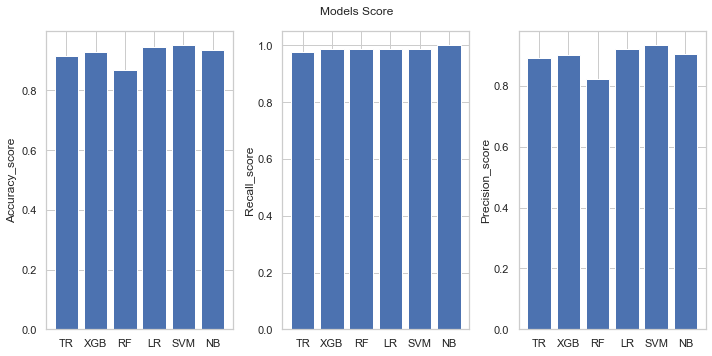

In [350]:
plt.figure(figsize=(10,5))
plt.subplot(1,3,1)
plt.bar(range(len(result_df['알고리즘'].values)), result_df['정확도'].values) 
plt.xticks(range(len(result_df['알고리즘'].values)), result_df['알고리즘'].values)
plt.ylabel('Accuracy_score')

plt.subplot(1,3,2)
plt.bar(range(len(result_df['알고리즘'].values)), result_df['재현율'].values) 
plt.xticks(range(len(result_df['알고리즘'].values)), result_df['알고리즘'].values)
plt.ylabel('Recall_score')

plt.subplot(1,3,3)
plt.bar(range(len(result_df['알고리즘'].values)), result_df['정밀도'].values) 
plt.xticks(range(len(result_df['알고리즘'].values)), result_df['알고리즘'].values)
plt.ylabel('Precision_score')

plt.suptitle('Models Score')
plt.tight_layout()
plt.show() 

### 이 경우엔 대체로 서포트벡터 머신 모형이 가장 높은 성능 기록했다. 